## Using EPANET-MSX in EPyT

### Outline
  - Initialize EPANET-Python Toolkit
  - Multi-species chemical reactions 

### Initialize EPANET Python Toolkit (EPyT)
You should always begin with this command to import the toolkit

In [2]:
%pip install epyt

Note: you may need to restart the kernel to use updated packages.


In [3]:
from epyt import epanet

### Load a benchmark network
Decide which benchmark network to use and load the network

In [4]:
# Decide which network to load from the "/networks/" folder  
filename = 'net2-cl2.inp' # You can also try 'net2-cl2.inp', 'Net3.inp', etc.
 
# Call epanet class and load all data and functions in G structure
G = epanet(filename)

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File net2-cl2.inp loaded successfully.



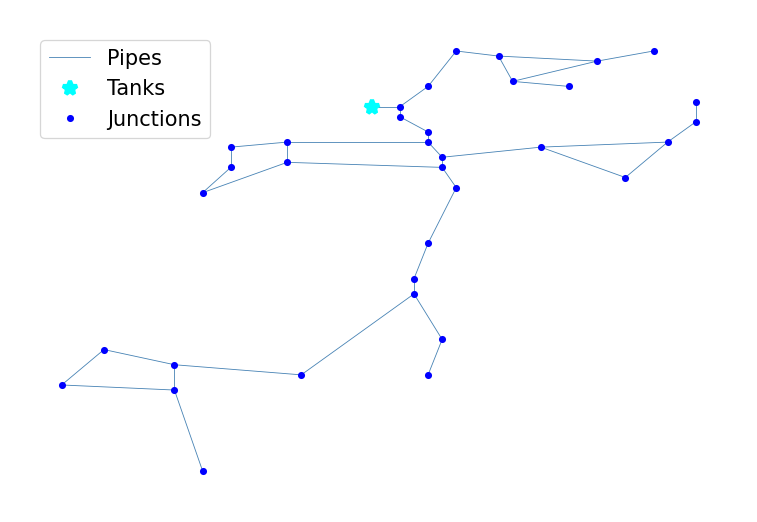

In [5]:
G.plot()
G.plot_close()

### Multi-species chemical reactions
![Alt text](images/im1.png)




Reactions in water can be described using a set of Differential Algebraic Equations (DAE):  
<br>
$ \frac{dx_b}{dt} = f(x_b,x_s,z_b,z_s) $   <br> <br>
$ \frac{dx_s}{dt} = g(x_b,x_s,z_b,z_s) $   <br>   <br>
$ 0 = h(x_b,x_s,z_b,z_s) $   

These equations describe most of the reactions in water distribution systems. The solution methodology follows the following steps:
  - Split the pipes into segments
  - Solve the reaction equations for each segment
  - Compute the advection (movement based on flows)
  - Mix the bulk concentrations with the pipe wall concentrations 
  - Recompute segmens

![Alt Text](images/im2.png)

The set of diferential equations can be solved using an explicit method, e.g. Runge-Kutta or Forward Euler method.
### Chlorine reactions
![Alt text](images/im3.png)

The most standard assumption is that Free Chlorine concentration is linear, i.e,  

$ \frac{dC(t)}{dt} = -k_bC(t) $ <br>
Where $ C(t) $ is the free chlorine concentration measured in $ mg/L $

In [6]:
# Example MSX file
with open('net2-cl2.msx', 'r') as fid:
    content = fid.read()
    print(content)

FileNotFoundError: [Errno 2] No such file or directory: 'net2-cl2.msx'

#### How to load an MSX file

In [7]:
# Load EPANET-MSX file
G.loadMSXFile('net2-cl2.msx')   # Load MSX file with reactions
qual_res_MSX = G.getMSXComputedQualitySpecie(['CL2'])

Opening MSX file:C:\Users\mkiri\anaconda3\envs\tutorial_epyt\lib\site-packages\epyt\networks\msx-examples\net2-cl2.msx
MSX file C:\Users\mkiri\anaconda3\envs\tutorial_epyt\lib\site-packages\epyt\networks\msx-examples\net2-cl2.msx loaded successfully.


In [30]:
Q_msx = G.getMSXComputedQualityNode() # Compute water quality using MSX
print('Q_msx =', Q_msx)

Q_msx = <epyt.epanet.EpytValues object at 0x00000176F3F9DFD0>


Plot MSX species in MATLAB Figure

In [31]:
G.plotMSXSpeciesNodeConcentration(5,1)

AttributeError: 'epanet' object has no attribute 'plotMSXSpeciesNodeConcentration'

#### Another example

In [ ]:
# Get quality of specific nodes.
sensor_index = [2, 3, 5]
sensors_names = G.getNodeNameID(sensor_index)
print('sensors_names =', sensors_names)

In [ ]:
QN = G.getMSXComputedQualityNode(sensor_index)
print('QN =', QN)

In [ ]:
# Get quality of specific links.
QL = G.getMSXComputedQualityLink(sensor_index)
print('QL =', QL)

In [ ]:
# Get species names.
type = G.getMSXSpeciesNameID()
 
# Get quality for specific species type (nodes and links).
MSX_comp = G.getMSXComputedQualitySpecie(type)

In [ ]:
G.plotMSXSpeciesNodeConcentration(3,1)

#### Unload libraries

In [ ]:
G.unloadMSX()
G.unload()